In [ ]:
#podstawowe importy
import pandas as pd
import numpy as np
import seaborn as sns

#dodatkowe importy
#z zadania EDA:
import json
#import datetime
import math
import datetime as dt
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

#z czyszczenia
import missingno as msno
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


# Nowa sekcja

In [ ]:
bankAdditionalDaneSurowe = pd.read_csv("bank.csv", index_col=False, sep=";")
bankAdditionalDaneSurowe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
column_names = bankAdditionalDaneSurowe.columns
counter = bankAdditionalDaneSurowe[column_names].isnull().sum()
print (counter)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
bankAdditionalDaneSurowe['age'].unique()
#bankAdditionalDaneSurowe['job'].unique()
#bankAdditionalDaneSurowe['marital'].unique()
#bankAdditionalDaneSurowe['education'].unique()
#bankAdditionalDaneSurowe['default'].unique()

#bankAdditionalDaneSurowe['housing'].unique()
#bankAdditionalDaneSurowe['loan'].unique()
#bankAdditionalDaneSurowe['contact'].unique()
#bankAdditionalDaneSurowe['month'].unique()
#bankAdditionalDaneSurowe['day_of_week'].unique()

#bankAdditionalDaneSurowe['duration'].unique()
#bankAdditionalDaneSurowe['campaign'].unique()
#bankAdditionalDaneSurowe['pdays'].unique()
#bankAdditionalDaneSurowe['previous'].unique()
#bankAdditionalDaneSurowe['poutcome'].unique()

#bankAdditionalDaneSurowe['emp.var.rate'].unique()
#bankAdditionalDaneSurowe['cons.price.idx'].unique()
#bankAdditionalDaneSurowe['cons.conf.idx'].unique()
#bankAdditionalDaneSurowe['euribor3m'].unique()
#bankAdditionalDaneSurowe['nr.employed'].unique()

#bankAdditionalDaneSurowe['y'].unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84])

In [ ]:
#wnioski:
#wpisy ponize 5% mozemy spokojnie poodrzucac ze zbioru którym będziemy uczyć i testować.
#Potem możemy wydobyc tylko te wybrakowane wpisy i zrobic na nich predykcje w oparciu o wyuczony model.
#kolumna 'default' ma 20% unknown-ów ale przy tym tylko 3 wpisy 'yes'. Mozna to potraktowac jako próbę zatajenia?
#jeśli nie wiadomo (klient nie podał) == coś może być nie tak. Odrzucimy wpisy 'yes' a unknown i no zamienimy na 0 i 1 potem 


bezUnknown = bankAdditionalDaneSurowe
#zaczynamy od 41188 wpisow
bezUnknown = bezUnknown[bezUnknown.job !="unknown"]
#40858
bezUnknown = bezUnknown[bezUnknown.marital !="unknown"]
#40787
bezUnknown = bezUnknown[bezUnknown.education !="unknown"]
#39191
bezUnknown = bezUnknown[bezUnknown.default !="yes"]
#39188
bezUnknown = bezUnknown[bezUnknown.housing !="unknown"]
#38242
bezUnknown = bezUnknown[bezUnknown.loan !="unknown"]
#38242

bezUnknown['y'].count()
#pozostaje 38242 wpisów. Wniosek: Były mocno wybrakowane wpisy

4238

In [ ]:
#czy mamy jakimś cudem duplikaty?
duplikaty=bezUnknown[bezUnknown.duplicated()]
duplikaty
#mamy 11 duplikatów
bezDuplikatow=bezUnknown.drop_duplicates()
bezDuplikatow['y'].count()

4238

In [ ]:
#obiekty wypada zamienic potem na kategorie
bezDuplikatow.dtypes
#ale czy mamy wartosci odstajace dla intow i floatów?

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
#dane są raczej czyste, tylko pozamieniać obiekty na kategorie a potem na wartości liczbowe
daneDoPorzadkowania = bezUnknown.copy(deep=True)
daneDoPorzadkowania.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
#kategorie
daneDoPorzadkowania['job']=daneDoPorzadkowania['job'].astype('category')
daneDoPorzadkowania['job'].value_counts()
#admin, blue-collar, technician, services, management, retired, enterpreneur, self-employed, housemaid, unemployed, student
#admin, pracownik fizyczny, technik, usługi, zarządzanie, emeryt, przedsiębiorca, samozatrudniony, pokojówka, bezrobotny, student
#przydzielmy wartości 'na logikę'
prace_toReplace = {'unemployed':'0','student':'1','retired':'2','housemaid':'3','blue-collar':'4',
                  'services':'5','technician':'6','self-employed':'7','admin.':'8','management':'9','entrepreneur':'10'}
daneDoPorzadkowania['job']=daneDoPorzadkowania['job'].replace(to_replace=prace_toReplace)

daneDoPorzadkowania['marital']=daneDoPorzadkowania['marital'].astype('category')
daneDoPorzadkowania['marital'].value_counts()
zwiazek_toReplace = {'single':'0','married':'1','divorced':'2'}
daneDoPorzadkowania['marital']=daneDoPorzadkowania['marital'].replace(to_replace=zwiazek_toReplace)

daneDoPorzadkowania['education']=daneDoPorzadkowania['education'].astype('category')
daneDoPorzadkowania['education'].value_counts()
edukacja_toReplace = {'illiterate':'0','basic.4y':'1','basic.6y':'2','basic.9y':'3',
                      'high.school':'4','professional.course':'5','university.degree':'6'}
daneDoPorzadkowania['education']=daneDoPorzadkowania['education'].replace(to_replace=edukacja_toReplace)

daneDoPorzadkowania['default']=daneDoPorzadkowania['default'].astype('category')
daneDoPorzadkowania['default'].value_counts()
default_toReplace = {'no':'0','unknown':'1'}
daneDoPorzadkowania['default']=daneDoPorzadkowania['default'].replace(to_replace=default_toReplace)
#daneDoPorzadkowania['default']=daneDoPorzadkowania['default'].astype('int')
#daneDoPorzadkowania['default']=daneDoPorzadkowania['default'].astype('bool')

daneDoPorzadkowania['housing']=daneDoPorzadkowania['housing'].astype('category')
daneDoPorzadkowania['loan']=daneDoPorzadkowania['loan'].astype('category')
yesNo_toReplace = {'no':'0','yes':'1'}
daneDoPorzadkowania['housing']=daneDoPorzadkowania['housing'].replace(to_replace=yesNo_toReplace)
daneDoPorzadkowania['loan']=daneDoPorzadkowania['loan'].replace(to_replace=yesNo_toReplace)

daneDoPorzadkowania['contact']=daneDoPorzadkowania['contact'].astype('category')
daneDoPorzadkowania['contact'].value_counts()
contact_toReplace = {'cellular':'0','telephone':'1'}
daneDoPorzadkowania['contact']=daneDoPorzadkowania['contact'].replace(to_replace=contact_toReplace)

daneDoPorzadkowania['month']=daneDoPorzadkowania['month'].astype('category')
daneDoPorzadkowania['month'].value_counts()
miesiac_toReplace = {'jan':'1','feb':'2','mar':'3',
                     'apr':'4','may':'5','jun':'6',
                     'jul':'7','aug':'8','sep':'9',
                     'oct':'10','nov':'11','dec':'12'}
daneDoPorzadkowania['month']=daneDoPorzadkowania['month'].replace(to_replace=miesiac_toReplace)

dzien_toReplace ={'mon':'1','tue':'2','wed':'3','thu':'4','fri':'5','sat':'6','sun':'7'}
#daneDoPorzadkowania['housing']=daneDoPorzadkowania['housing'].replace(to_replace=yesNo_toReplace)

daneDoPorzadkowania['poutcome']=daneDoPorzadkowania['poutcome'].astype('category')
daneDoPorzadkowania['poutcome'].value_counts()
poutcome_toReplace ={'nonexistent':'0','failure':'1','success':'2'}
daneDoPorzadkowania['poutcome']=daneDoPorzadkowania['poutcome'].replace(to_replace=poutcome_toReplace)

daneDoPorzadkowania['y']=daneDoPorzadkowania['y'].astype('category')
daneDoPorzadkowania['y'].value_counts()
result_toReplace ={'no':'0','yes':'1'}
daneDoPorzadkowania['y']=daneDoPorzadkowania['y'].replace(to_replace=result_toReplace)
#daneDoPorzadkowania['poutcome']=daneDoPorzadkowania['poutcome'].replace(to_replace=poutcome_toReplace)

In [ ]:
daneDoPorzadkowania.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,primary,0,1787,0,0,0,19,10,79,1,-1,0,unknown,no
1,33,5,1,secondary,0,4789,1,1,0,11,5,220,1,339,4,failure,no
2,35,9,0,tertiary,0,1350,1,0,0,16,4,185,1,330,1,failure,no
3,30,9,1,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown,no
4,59,4,1,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,no


In [ ]:
daneDoPorzadkowania.dtypes

age             int64
job            object
marital        object
education    category
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
#konwersja z kategorii na inty i boole
daneGotowe = daneDoPorzadkowania.copy(deep=True)

daneGotowe['job']=daneGotowe['job'].astype('int')
daneGotowe['marital']=daneGotowe['marital'].astype('int')

daneGotowe['default']=daneGotowe['default'].astype('int')
daneGotowe['default']=daneGotowe['default'].astype('bool')
daneGotowe['housing']=daneGotowe['housing'].astype('int')
daneGotowe['housing']=daneGotowe['housing'].astype('bool')
daneGotowe['loan']=daneGotowe['loan'].astype('int')
daneGotowe['loan']=daneGotowe['loan'].astype('bool')
daneGotowe['contact']=daneGotowe['contact'].astype('bool')

daneGotowe['month']=daneGotowe['month'].astype('int')

daneGotowe['y']=daneGotowe['y'].astype('bool')

In [ ]:
daneGotowe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1,False,False,False,True,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,False
1,57,5,1,4,True,False,False,True,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,False
2,37,5,1,4,False,True,False,True,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,False
3,40,8,1,2,False,False,False,True,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,False
4,56,5,1,4,False,False,True,True,5,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,False


In [ ]:
daneGotowe.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default              bool
housing              bool
loan                 bool
contact              bool
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    bool
dtype: object

In [ ]:
daneGotowe
#jeszcze trzeba poprawic indeksy
cols_to_drop = ['index']

daneGotowe = daneGotowe.reset_index().drop(cols_to_drop, axis=1)
daneGotowe.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,primary,False,1787,False,False,True,19,10,79,1,-1,0,unknown,True
1,33,5,1,secondary,False,4789,True,True,True,11,5,220,1,339,4,failure,True
2,35,9,0,tertiary,False,1350,True,False,True,16,4,185,1,330,1,failure,True
3,30,9,1,tertiary,False,1476,True,True,True,3,6,199,4,-1,0,unknown,True
4,59,4,1,secondary,False,0,True,False,True,5,5,226,1,-1,0,unknown,True
5,35,9,0,tertiary,False,747,False,False,True,23,2,141,2,176,3,failure,True
6,36,7,1,tertiary,False,307,True,False,True,14,5,341,1,330,2,other,True
7,39,6,1,secondary,False,147,True,False,True,6,5,151,2,-1,0,unknown,True
8,41,10,1,tertiary,False,221,True,False,True,14,5,57,2,-1,0,unknown,True
9,43,5,1,primary,False,-88,True,True,True,17,4,313,1,147,2,failure,True


In [ ]:
daneGotowe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,primary,False,1787,False,False,True,19,10,79,1,-1,0,unknown,True
1,33,5,1,secondary,False,4789,True,True,True,11,5,220,1,339,4,failure,True
2,35,9,0,tertiary,False,1350,True,False,True,16,4,185,1,330,1,failure,True
3,30,9,1,tertiary,False,1476,True,True,True,3,6,199,4,-1,0,unknown,True
4,59,4,1,secondary,False,0,True,False,True,5,5,226,1,-1,0,unknown,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,32,5,0,secondary,False,473,True,False,True,7,7,624,5,-1,0,unknown,True
4234,33,5,1,secondary,False,-333,True,False,True,30,7,329,5,-1,0,unknown,True
4235,57,6,1,secondary,False,295,False,False,True,19,8,151,11,-1,0,unknown,True
4236,28,4,1,secondary,False,1137,False,False,True,6,2,129,4,211,3,other,True


In [ ]:
#szybki eksport
daneGotowe.to_csv('bank-full_clean.csv',index=False)
daneGotowe_clean=pd.read_csv('bank-full_clean.csv')

In [ ]:

daneGotowe_clean.dtypes

age           int64
job           int64
marital       int64
education    object
default        bool
balance       int64
housing        bool
loan           bool
contact        bool
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y              bool
dtype: object

0.6320754716981132


(array([ 9., 19., 25., 21., 41., 34., 28., 13.,  6.,  4.]),
 array([0.61320755, 0.62688679, 0.64056604, 0.65424528, 0.66792453,
        0.68160377, 0.69528302, 0.70896226, 0.72264151, 0.73632075,
        0.75      ]),
 <a list of 10 Patch objects>)

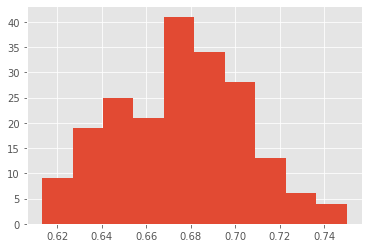

In [ ]:
#powinno być okej. Zobaczmy czy można przewidzieć niektóre wartości na podstawie innych (niekoniecznie będące wynikiem Y)
#czy na podstawie wieku, pracy i statusu matrymonialnego można określić poziom edukacji? 

DaneDlaModelu = daneGotowe_clean.loc[:,['age', 'job', 'marital','education']]
#DaneDlaModelu.head()

all_inputs = DaneDlaModelu[['age', 'job', 'marital']].values
all_labels = DaneDlaModelu['education'].values

all_inputs[:5]

from sklearn.model_selection import train_test_split


(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.05, random_state=1)


from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)
print(decision_tree_classifier.score(testing_inputs, testing_classes))


model_accuracies = []

for repetition in range(200):

    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.05)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies, bins=10)

#no tak średnio bym powiedział

0.706408345752608
0.6650943396226415


(array([ 2.,  8., 13., 27., 48., 46., 28., 17.,  8.,  3.]),
 array([0.60377358, 0.62311321, 0.64245283, 0.66179245, 0.68113208,
        0.7004717 , 0.71981132, 0.73915094, 0.75849057, 0.77783019,
        0.79716981]),
 <a list of 10 Patch objects>)

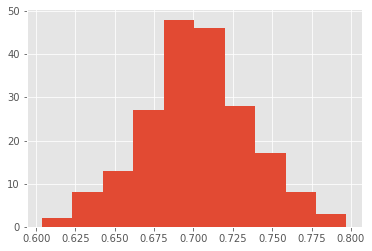

In [ ]:
#a odrzućmy wiek

DaneDlaModelu = daneGotowe_clean.loc[:,['job', 'marital','education']]
#DaneDlaModelu.head()

all_inputs = DaneDlaModelu[['job', 'marital']].values
all_labels = DaneDlaModelu['education'].values

all_inputs[:5]

from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.05, random_state=1)

from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)
print(decision_tree_classifier.score(training_inputs, training_classes))
print(decision_tree_classifier.score(testing_inputs, testing_classes))


model_accuracies = []

for repetition in range(200):

    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.05)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies, bins=10)


In [ ]:
#jakie właściwie mamy atrybuty?

#atrybuty dotyczące konta/klienta
#1. age - wiek
#2. job - praca
#3. marital - status cywilny
#4. education - wykształcenie
#5. default - czy były problemy z płatnościami. Albo nie było, albo jest to niepewne (ryzyko)
#6. housing - czy jest kredyt... hipoteczny?
#7. loan - czy jest po prostu kredyt

#atrybuty dotyczące tylko ostatniego kontaktu
#8. contact - sposób kontaktu banku z klientem
#9. month - w którym miesiącu był ostatni kontakt - nie znamy "obecnego" miesiąca, nie wiadomo jak to wpłynie na wyniki
#10. day_of_week - w jaki dzień był ostatni kontakt
#11. uration - ile trwał ostatni kontakt

#atrybuty dotyczące obecnej kampanii
#12. campaign - liczba kontaktów
#13. pdays - odstęp od kontaktu w ramach poprzedniej kampanii (999 = brak kontaktu/kampanii)
#14. previous - liczba kontaktów w ramach poprzedniej kampanii
#15. poutcome - wynik poprzedniej kampanii

#atrybuty socialne/wskaźniki zewnętrzne
#16. emp.var.rate - kwartalny wskaźnik bezrobocia(?) (lub odwrotność, wskaźnik zatrudnienia do populacji)
#17. cons.price.idx - miesięczny wskaźnik inflacji
#18. cons.conf.idx - miesięczny wskaźnik ufności konsumenckiej - udział konsumpcji w pkb
#19. euribor3m - Euro Interbank Offered Rate, referencyjna wartość oprocentowania z trzech ostatnich miesięcy
#20. nr.employed - liczba zatrudnionych? Niezbyt to ma sens w oparciu o plik informacyjny dla datasetu, jest często stała

#wynik
#21. y - czy klient założył lokatę

0.6273584905660378


(array([ 1.,  5., 13., 27., 31., 31., 43., 22., 16., 11.]),
 array([0.55188679, 0.56745283, 0.58301887, 0.59858491, 0.61415094,
        0.62971698, 0.64528302, 0.66084906, 0.67641509, 0.69198113,
        0.70754717]),
 <a list of 10 Patch objects>)

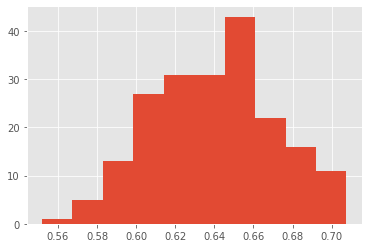

In [ ]:
#a jeśli weźmiemy 7 pierwszych atrybutów pod uwagę? czy wynik predykcji będzie lepszy?
#być może to czy ktoś jest skłonny wziąć kredyt, również wynika z jego edukacji? (podatność na reklamę? sumienność spłacania?)

DaneDlaModelu = daneGotowe_clean.loc[:,['age', 'job', 'marital','education','default','housing','loan']]
#DaneDlaModelu.head()

all_inputs = DaneDlaModelu[['age', 'job', 'marital','default','housing','loan']].values
all_labels = DaneDlaModelu['education'].values

all_inputs[:5]

from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.05, random_state=1)

from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)
print(decision_tree_classifier.score(testing_inputs, testing_classes))


model_accuracies = []

for repetition in range(200):

    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.05)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies, bins=10)

In [ ]:
#zróbmy siatkę dla powyższego przykładku

DaneDlaModelu = daneGotowe_clean.loc[:,['age', 'job', 'marital','education','default','housing','loan']]
#DaneDlaModelu.head()

all_inputs = DaneDlaModelu[['age', 'job', 'marital','default','housing','loan']].values
all_labels = DaneDlaModelu['education'].values

all_inputs[:5]

from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.05, random_state=1)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10],
                  'max_features': [1, 2, 3, 4,5,6,7,8,9]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7104844105446273
Best parameters: {'max_depth': 6, 'max_features': 6}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]
